#### **The Sparks Foundation** <br>
#### **Data Science & Business Analytics Internship**

Author - Raj Kansal <br>
E-mail - rajkansal2001@gmail.com <br>
Linkedin - www.linkedin.com/in/raj-kansal-0319 

#### **TASK 1 - Prediction using Supervised ML** <br>

##### **--Predict the percentage of a student based on number of study hours**

#### **Importing the Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")  #reading the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.info()   #getting the info of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()  #getting the description of our dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum()  #checking for any null-values, and as we can see there are no null values

Hours     0
Scores    0
dtype: int64

#### **Visualizing the Dataset**

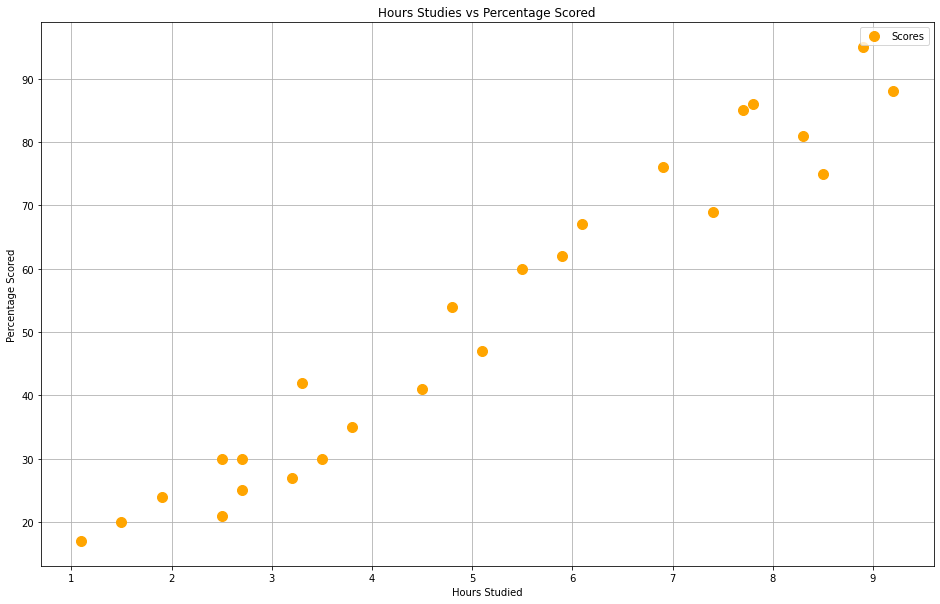

In [53]:
df.plot(x="Hours", y= "Scores", color = 'orange', style='o', markersize =10)
plt.title('Hours Studies vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.grid()
plt.show()
plt.rcParams["figure.figsize"] = [16,10]

**Here we can see the linearity between the percentage scored and hours studied; i.e they are directly proportional**

In [27]:
df.corr() #checking the correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [28]:
#using iloc to segregate data
X = df.iloc[:,:1].values
y = df.iloc[:, 1:].values

**Training and Testing the Data**

In [29]:
#splitting the data into testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

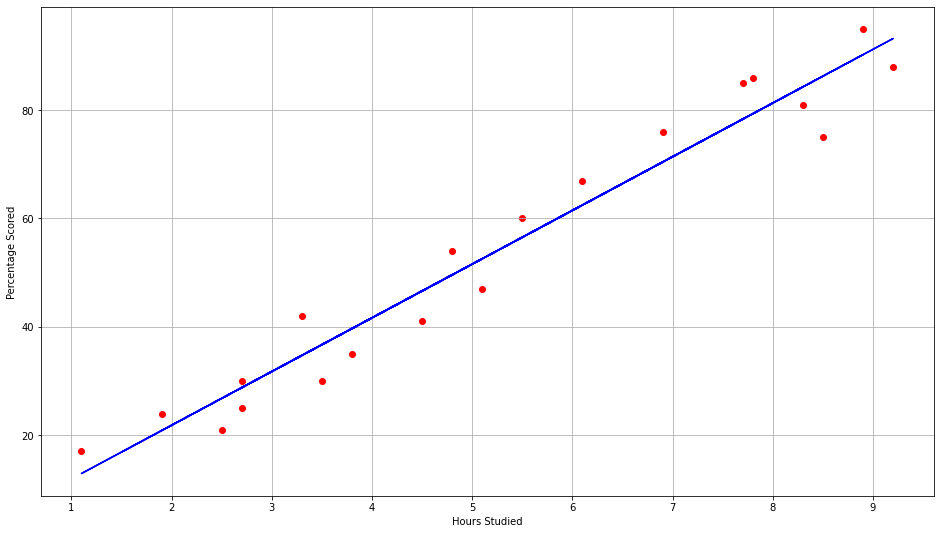

In [48]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.grid()
plt.show()

**Making Predictions**

In [38]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
compare

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [43]:
# Testing with our own data

hours = 9.25
own_pred = model.predict([[hours]])
print("Predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


**Evaluating the model**

In [44]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
